## Imports

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data and cleaning

In [2]:
df = pd.read_csv('data/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.drop(columns=['name', 'host_name'], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

In [5]:
df.rename(columns={'neighbourhood': 'neighborhood'}, inplace=True)

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
neigh_ny_gdf = gpd.read_file('data/NY Neighborhood Areas.json')
neigh_ny_gdf.drop(columns=['boroughCode', '@id'], inplace=True)
neigh_ny_gdf

,neighborhood,borough,geometry
0,Allerton,Bronx,"POLYGON ((-73.84860 40.87167, -73.84582 40.870..."
1,Alley Pond Park,Queens,"POLYGON ((-73.74333 40.73888, -73.74371 40.739..."
2,Arden Heights,Staten Island,"POLYGON ((-74.16983 40.56108, -74.16982 40.561..."
3,Arlington,Staten Island,"POLYGON ((-74.15975 40.64142, -74.15998 40.641..."
4,Arrochar,Staten Island,"POLYGON ((-74.06078 40.59319, -74.06079 40.593..."
...,...,...,...
305,Windsor Terrace,Brooklyn,"POLYGON ((-73.98006 40.66075, -73.97988 40.660..."
306,Woodhaven,Queens,"POLYGON ((-73.86233 40.69596, -73.85654 40.697..."
307,Woodlawn,Bronx,"POLYGON ((-73.85947 40.90052, -73.85926 40.900..."
308,Woodrow,Staten Island,"POLYGON ((-74.17728 40.54063, -74.17723 40.539..."


## Questions

### 1 - What can we learn about different hosts and areas?

/tmp/ipykernel_23115/3176426070.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(columns=['id', 'host_id', 'latitude', 'longitude']).corr(method='spearman'))


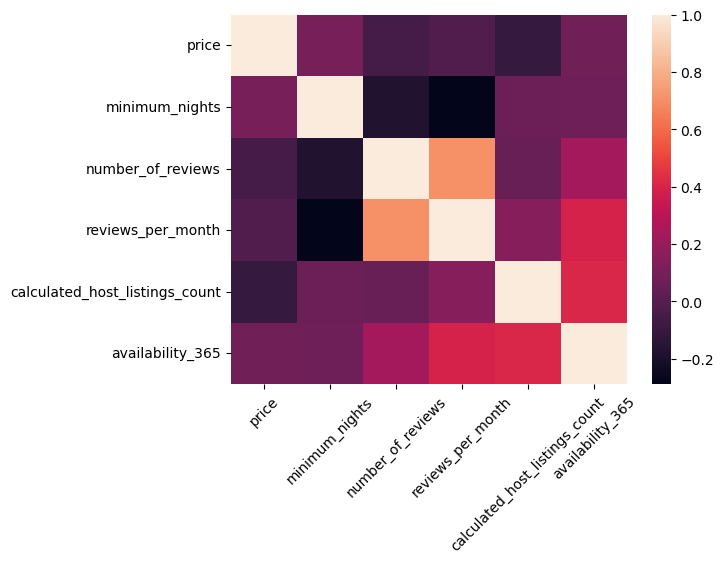

In [9]:
sns.heatmap(df.drop(columns=['id', 'host_id', 'latitude', 'longitude']).corr(method='spearman'))
plt.xticks(rotation=45);

#### Number of locations per host

In [72]:
print('unique hosts:',  len(df['host_id'].unique()))
print('unique places:', len(df['id'].unique()))
print('unique neighborhoods:', len(df['neighborhood'].unique()))

unique hosts: 37457
unique places: 48895
unique neighborhoods: 221


In [73]:
locations_owned_df = df[['id', 'host_id']].groupby(by='host_id').count().sort_values(by='id', ascending=False)
locations_owned_df.reset_index(inplace=True)
locations_owned_df

,host_id,id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
...,...,...
37452,13540183,1
37453,13538150,1
37454,13535952,1
37455,13533446,1


In [74]:
locations_owned_df['id'].describe()

count    37457.000000
mean         1.305363
std          2.760747
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.000000
Name: id, dtype: float64

##### Conclusion: The majority of hosts(32303) has only one location to rent.

#### Distribution of rental locations in NYC

In [75]:
df_neighborhood = df[['id', 'neighborhood']].groupby(by='neighborhood').count().sort_values(by='id')
df_neighborhood.rename(columns={'id': 'locations_count'}, inplace=True)
df_neighborhood.reset_index(inplace=True)
df_neighborhood

,neighborhood,locations_count
0,Rossville,1
1,Richmondtown,1
2,Fort Wadsworth,1
3,Willowbrook,1
4,New Dorp,1
...,...,...
216,Upper West Side,1971
217,Bushwick,2465
218,Harlem,2658
219,Bedford-Stuyvesant,3714


In [76]:
df_neighborhood.describe()

,locations_count
count,221.000000
mean,221.244344
std,536.160961
min,1.000000
25%,10.000000
50%,32.000000
75%,154.000000
max,3920.000000


In [77]:
neigh_ny = neigh_ny_gdf.merge(df_neighborhood, on='neighborhood', how='left')
neigh_ny.sort_values(by='locations_count', ascending=False, inplace=True)
neigh_ny

,neighborhood,borough,geometry,locations_count
303,Williamsburg,Brooklyn,"POLYGON ((-73.95757 40.72510, -73.95300 40.722...",3920.0
16,Bedford-Stuyvesant,Brooklyn,"POLYGON ((-73.94115 40.70028, -73.90548 40.680...",3714.0
128,Harlem,Manhattan,"POLYGON ((-73.93457 40.82815, -73.93442 40.827...",2658.0
43,Bushwick,Brooklyn,"POLYGON ((-73.90582 40.69411, -73.90158 40.691...",2465.0
290,Upper West Side,Manhattan,"POLYGON ((-73.95836 40.80037, -73.98144 40.768...",1971.0
...,...,...,...,...
246,Randall's Island,Manhattan,"POLYGON ((-73.92134 40.80085, -73.92103 40.800...",NaN
252,Rikers Island,Bronx,"POLYGON ((-73.88835 40.79814, -73.88831 40.798...",NaN
255,Rockaway Park,Queens,"POLYGON ((-73.81641 40.58262, -73.81929 40.581...",NaN
268,South Brother Island,Bronx,"POLYGON ((-73.89681 40.79581, -73.89694 40.795...",NaN


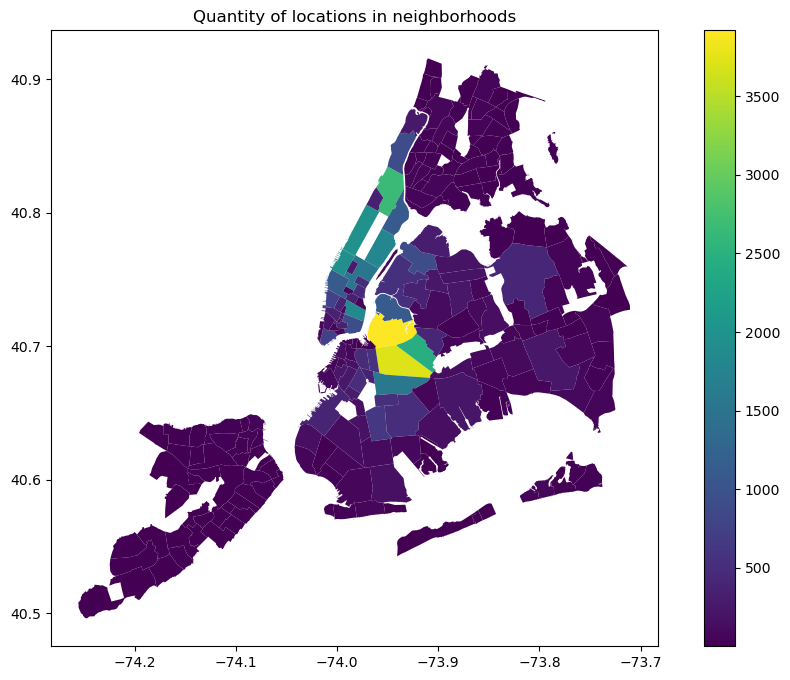

In [78]:
neigh_ny.plot(column='locations_count', figsize=(12, 8), legend=True)
plt.title('Quantity of locations in neighborhoods');

In [79]:
neigh_ny[['borough', 'locations_count']].groupby(by='borough').sum()

,locations_count
borough,
Bronx,1109.0
Brooklyn,20104.0
Manhattan,21661.0
Queens,5703.0
Staten Island,373.0


##### Conclusion: The majority of the rental locations are located in Manhattan and Brooklyn. The top 5 most common neighborhood to exist a rental location are Williamsburg(Brooklyn), Bedford-Stuyvesant(Brooklyn), Harlem(Manhattan), Bushwick(Brooklyn) and Upper West Side(Manhattan)

#### Distribution of rental prices in NYC

In [80]:
df_price = df[['price', 'neighborhood']].groupby(by=['neighborhood']).mean().sort_values(by='price')
df_price.rename(columns={'price': 'mean_price'}, inplace=True)
df_price.reset_index(inplace=True)
df_price

,neighborhood,mean_price
0,Bull's Head,47.333333
1,Hunts Point,50.500000
2,Tremont,51.545455
3,Soundview,53.466667
4,New Dorp,57.000000
...,...,...
216,Riverdale,442.090909
217,Sea Gate,487.857143
218,Tribeca,490.638418
219,Woodrow,700.000000


In [81]:
df_price.describe()

,mean_price
count,221.000000
mean,133.248493
std,94.530766
min,47.333333
25%,81.730769
50%,101.800000
75%,152.714286
max,800.000000


In [96]:
neigh_ny = neigh_ny_gdf.merge(df_price, on='neighborhood', how='left')
neigh_ny.sort_values(by='mean_price', ascending=False, inplace=True)
neigh_ny.dropna()

,neighborhood,borough,geometry,mean_price
110,Fort Wadsworth,Staten Island,"POLYGON ((-74.06078 40.59319, -74.06283 40.595...",800.000000
308,Woodrow,Staten Island,"POLYGON ((-74.17728 40.54063, -74.17723 40.539...",700.000000
285,Tribeca,Manhattan,"POLYGON ((-74.00189 40.71940, -74.00353 40.717...",490.638418
261,Sea Gate,Brooklyn,"POLYGON ((-74.00388 40.58164, -74.00395 40.581...",487.857143
253,Riverdale,Bronx,"POLYGON ((-73.90194 40.90121, -73.90416 40.901...",442.090909
...,...,...,...,...
202,New Dorp,Staten Island,"POLYGON ((-74.11483 40.57918, -74.10583 40.574...",57.000000
266,Soundview,Bronx,"POLYGON ((-73.85826 40.82201, -73.87977 40.819...",53.466667
284,Tremont,Bronx,"POLYGON ((-73.89709 40.85197, -73.89556 40.851...",51.545455
140,Hunts Point,Bronx,"POLYGON ((-73.88319 40.82028, -73.88291 40.819...",50.500000


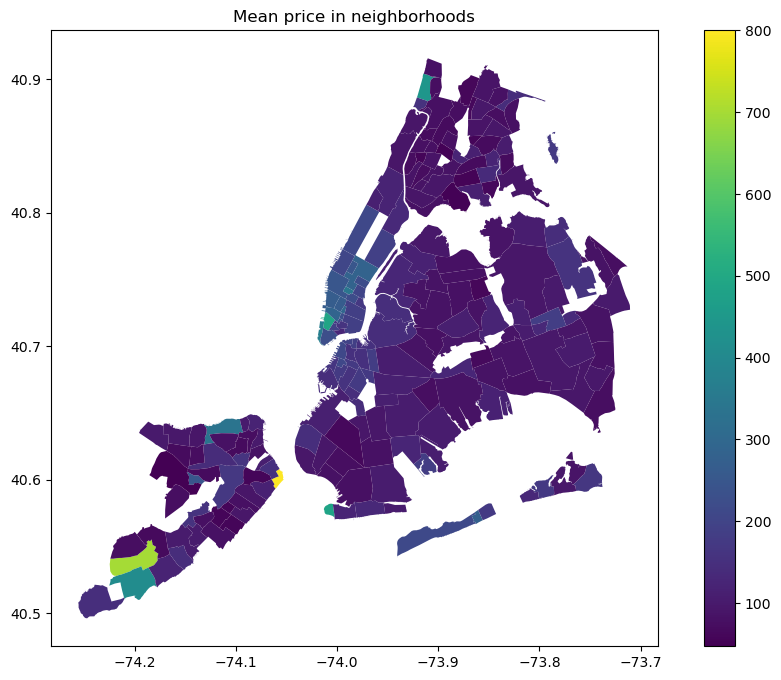

In [89]:
neigh_ny.plot(column='mean_price', figsize=(12, 8), legend=True)
plt.title('Mean price in neighborhoods');

In [95]:
neigh_ny[['borough', 'mean_price']].dropna().groupby(by='borough').mean()

,mean_price
borough,
Bronx,95.160385
Brooklyn,137.685040
Manhattan,212.277558
Queens,108.494026
Staten Island,142.945734


##### Conclusion: The most expensive rental locations are in Manhattan, Staten Island and Brooklyn boroughs and the cheapest is Bronx. But the most expensive and the cheapest locations are both in Staten Island, on the neighborhoods Fort Wadsworth and Bull's Head respectively.

#### Distribution of room types and it's prices in NYC

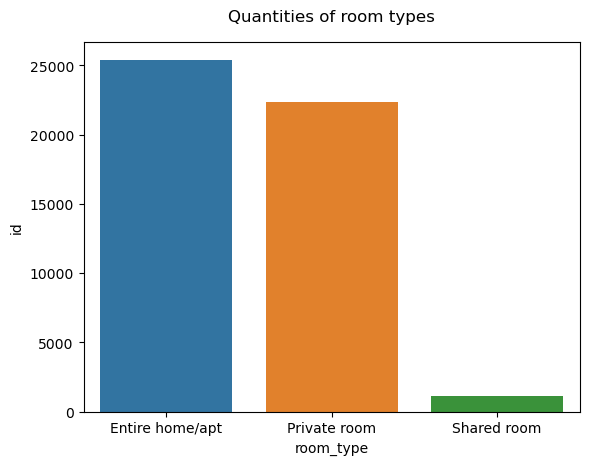

In [45]:
df_qtd_room_type_ny = df[['room_type', 'id']].groupby(by=['room_type']).count()
sns.barplot(data=df_qtd_room_type_ny, x=df_qtd_room_type_ny.index, y='id')
plt.title('Quantities of room types', pad=15);

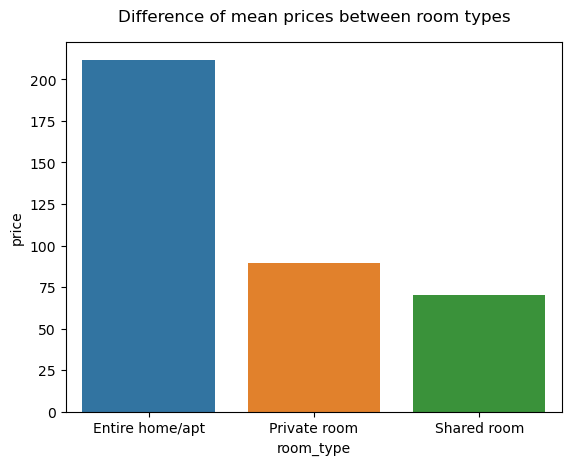

In [32]:
df_price_room_type_ny = df[['price', 'room_type']].groupby(by=['room_type']).mean()
sns.barplot(data=df_price_room_type_ny, x=df_price_room_type_ny.index, y='price')
plt.title('Difference of mean prices between room types', pad=15);

In [20]:
df_price_room_type = df[['price', 'neighborhood', 'room_type']].groupby(by=['neighborhood', 'room_type']).mean()#.sort_values(by='price')
df_price_room_type.rename(columns={'price': 'mean_price'}, inplace=True)
df_price_room_type

mean_price
neighborhood  room_type                  
Allerton      Entire home/apt  123.062500
              Private room      65.769231
Arden Heights Entire home/apt   76.000000
              Private room      41.000000
Arrochar      Entire home/apt  189.700000
...                                   ...
Woodlawn      Shared room       70.000000
Woodrow       Entire home/apt  700.000000
Woodside      Entire home/apt  148.714286
              Private room      61.777778
              Shared room       65.000000

[540 rows x 1 columns]

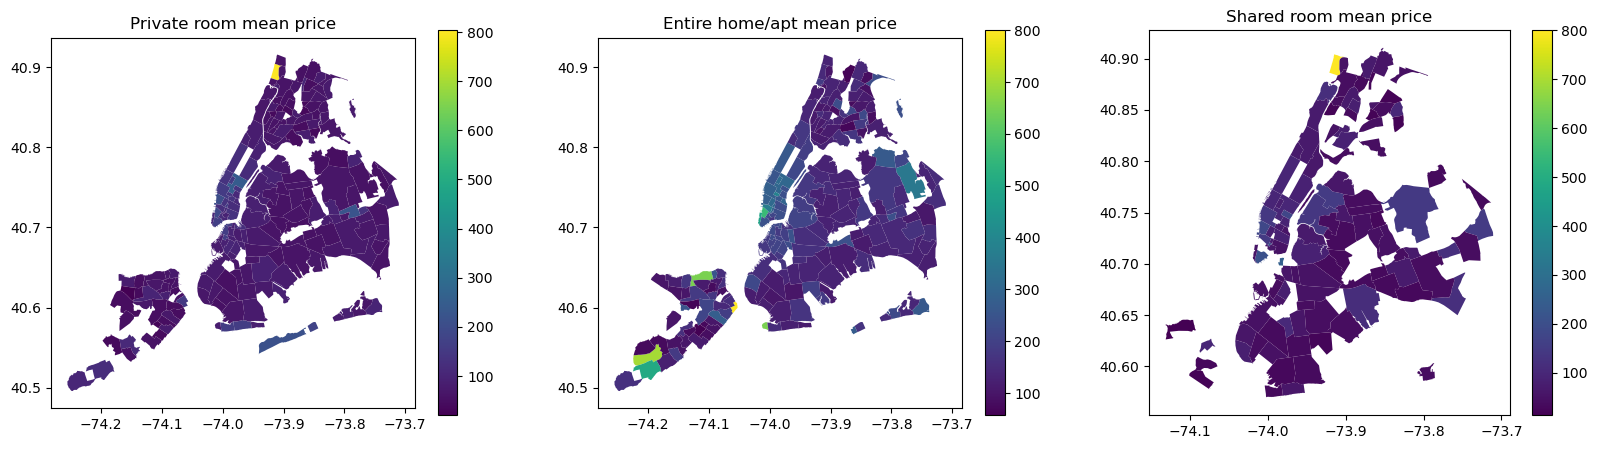

In [21]:
df_price_room_type.reset_index(inplace=True)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axes = axes.ravel()

for i, room_type in enumerate(df['room_type'].unique()):
    room_type_df = df_price_room_type.query(f"room_type == '{room_type}'")
    neigh_ny = neigh_ny_gdf.merge(room_type_df, on='neighborhood', how='left')
    #print(neigh_ny)
    neigh_ny.sort_values(by='mean_price', ascending=False, inplace=True)
    neigh_ny.plot(column='mean_price', legend=True, ax=axes[i])#figsize=(25), 
    axes[i].set_title(f'{room_type} mean price');
    #neigh_ny.dropna()

In [22]:
df_price_room_type.sort_values(by='mean_price', ascending=False)

,neighborhood,room_type,mean_price
410,Riverdale,Private room,803.5
411,Riverdale,Shared room,800.0
205,Fort Wadsworth,Entire home/apt,800.0
536,Woodrow,Entire home/apt,700.0
393,Randall Manor,Entire home/apt,651.0
...,...,...,...
377,Pelham Gardens,Shared room,20.0
323,Morris Heights,Shared room,20.0
499,Van Nest,Shared room,20.0
424,Schuylerville,Shared room,20.0


In [18]:
neigh_ny = neigh_ny_gdf.merge(df_price_room_type, on='neighborhood', how='left').dropna()
neigh_ny[['borough', 'room_type', 'mean_price']].dropna().groupby(by=['borough', 'room_type']).mean()

mean_price
borough       room_type                  
Bronx         Entire home/apt  132.839985
              Private room      77.574547
              Shared room       78.529167
Brooklyn      Entire home/apt  175.842645
              Private room      86.959490
              Shared room       58.384837
Manhattan     Entire home/apt  260.705137
              Private room     125.170622
              Shared room       98.674729
Queens        Entire home/apt  154.696403
              Private room      77.979268
              Shared room       62.978908
Staten Island Entire home/apt  181.923413
              Private room      65.086999
              Shared room       40.354167

In [13]:
df_count_room_type = df[['id', 'neighborhood', 'room_type']].groupby(by=['neighborhood', 'room_type']).count()
df_count_room_type.rename(columns={'id': 'room_type_count'}, inplace=True)

room_type_count
neighborhood  room_type                       
Allerton      Entire home/apt               16
              Private room                  26
Arden Heights Entire home/apt                3
              Private room                   1
Arrochar      Entire home/apt               10
...                                        ...
Woodlawn      Shared room                    1
Woodrow       Entire home/apt                1
Woodside      Entire home/apt               63
              Private room                 171
              Shared room                    1

[540 rows x 1 columns]

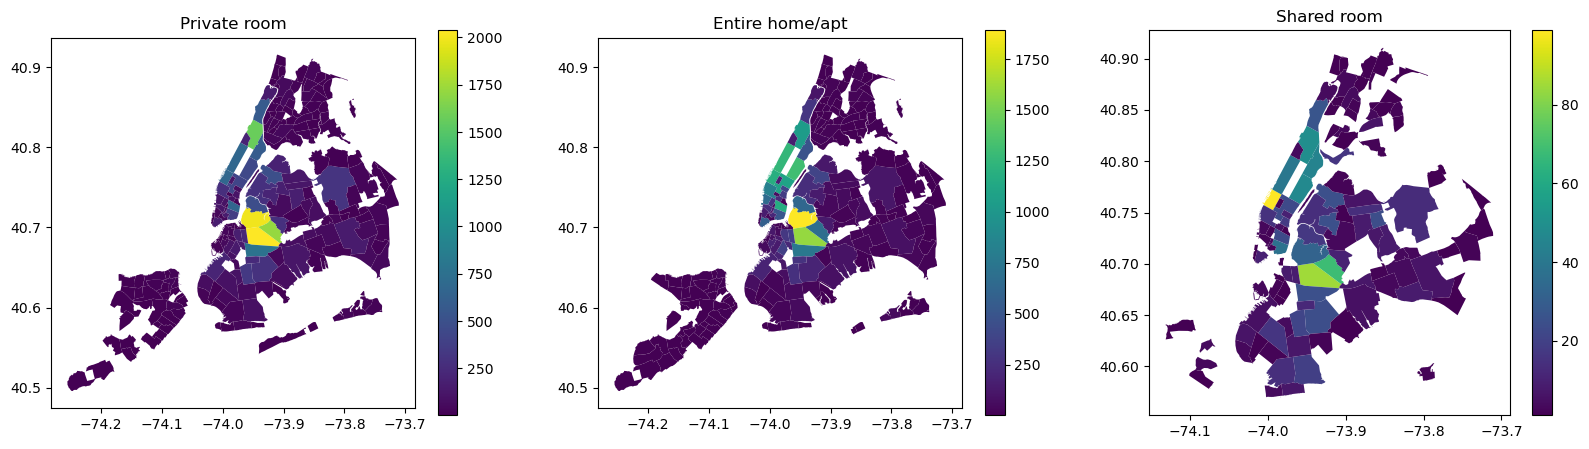

In [15]:
df_count_room_type.reset_index(inplace=True)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axes = axes.ravel()

for i, room_type in enumerate(df['room_type'].unique()):
    room_type_df = df_count_room_type.query(f"room_type == '{room_type}'")
    neigh_ny = neigh_ny_gdf.merge(room_type_df, on='neighborhood', how='left')
    #print(neigh_ny)
    neigh_ny.sort_values(by='room_type_count', ascending=False, inplace=True)
    neigh_ny.plot(column='room_type_count', legend=True, ax=axes[i])#figsize=(25), 
    axes[i].set_title(f'{room_type}');
    #neigh_ny.dropna()

In [35]:
df_count_room_type.sort_values(by='room_type_count', ascending=False)

,neighborhood,room_type,room_type_count
31,Bedford-Stuyvesant,Private room,2038
525,Williamsburg,Private room,1997
524,Williamsburg,Entire home/apt,1891
68,Bushwick,Private room,1719
30,Bedford-Stuyvesant,Entire home/apt,1591
...,...,...,...
421,Rossville,Entire home/apt,1
411,Riverdale,Shared room,1
405,Richmondtown,Entire home/apt,1
395,Randall Manor,Shared room,1


In [34]:
neigh_ny = neigh_ny_gdf.merge(df_count_room_type, on='neighborhood', how='left').dropna()
neigh_ny[['borough', 'room_type', 'room_type_count']].dropna().groupby(by=['borough', 'room_type']).sum()

room_type_count
borough       room_type                       
Bronx         Entire home/apt            390.0
              Private room               659.0
              Shared room                 60.0
Brooklyn      Entire home/apt           9559.0
              Private room             10132.0
              Shared room                413.0
Manhattan     Entire home/apt          13199.0
              Private room              7982.0
              Shared room                480.0
Queens        Entire home/apt           2112.0
              Private room              3393.0
              Shared room                198.0
Staten Island Entire home/apt            176.0
              Private room               188.0
              Shared room                  9.0

##### Conclusion: In the city, the quantity of rental locations types are very different, with more entire apts, followed by private rooms and by shared rooms, with far less quantity then the other two. It's prices are logically differents, the entire apt are generally much more expensive then the private room, and the private room a little bit more expensive then the shared room. <br><br> Now, looking into the boroughs, was expected that Brooklyn and Manhattan had much more quantity than the other ones, since the previous conclusion showed that. But it persisted for each room type too. Analysing the price of each room type, and the average price of all the three types in Manhattan are more expensive then in the rest of the city. Previously, it was seen that the price of Staten Island for rental was more expensive than in Brooklyn, and the reason for this is only because of the difference of average in entire apt price, but the borough of Brooklyn has higher average prices of private and shared rooms.

#### Type of rental contract

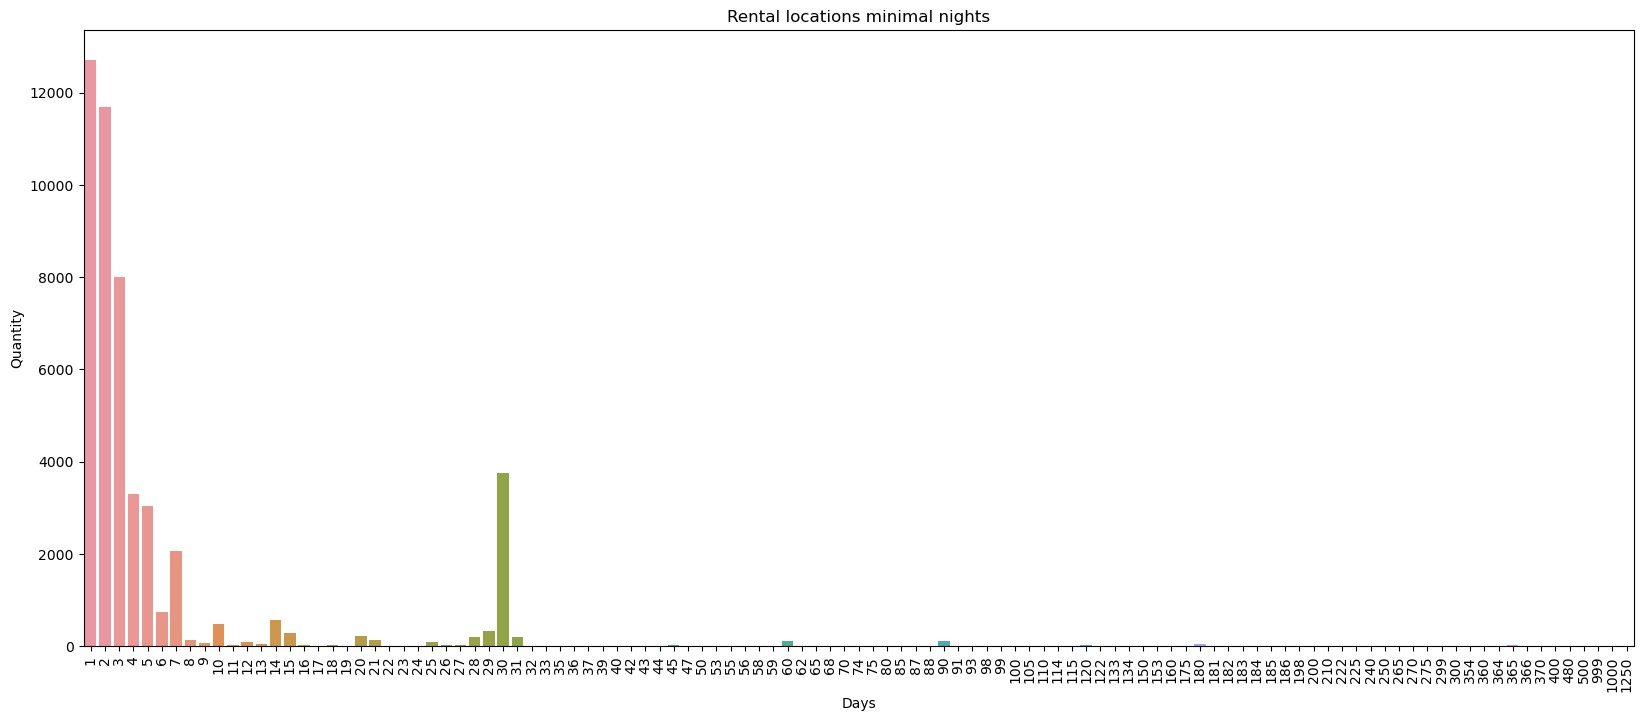

In [61]:
values, counts = np.unique(df['minimum_nights'], return_counts=True)#.unique()

plt.figure(figsize=(20, 8))
sns.barplot(x=values, y=counts)
plt.xticks(rotation=90);
plt.title("Rental locations minimal nights")
plt.xlabel("Days")
plt.ylabel("Quantity");

In [62]:
# minimum_nights <= 7 -> short_time; minimum_nights > 7 <= 30 -> medium_time; minimum_nights > 30 - > long_time
df['rental_stay'] = df['minimum_nights'].apply(lambda x: 'short_time' if x <= 7 else 'medium_time' if x <=30 else 'long_time')

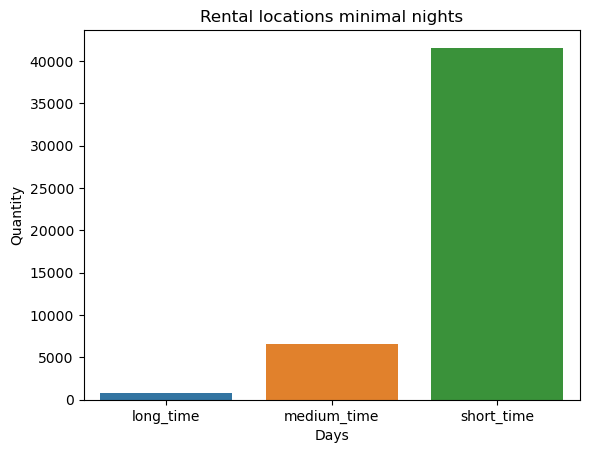

In [66]:
values, counts = np.unique(df['rental_stay'], return_counts=True)

sns.barplot(x=values, y=counts)
plt.title("Rental locations minimal nights")
plt.xlabel("Days")
plt.ylabel("Quantity");

In [67]:
df[['room_type', 'rental_stay', 'id']].groupby(by=['room_type', 'rental_stay']).count()

id
room_type       rental_stay       
Entire home/apt long_time      504
                medium_time   4175
                short_time   20730
Private room    long_time      226
                medium_time   2260
                short_time   19840
Shared room     long_time       17
                medium_time    151
                short_time     992

##### Conclusion: As seen, the short_time classification is predominant, that might indicate that is a turistic city. The data also shows that in all room types, the short stay is the majority, followed by medium time and at least, long time.

### 2 - Which rental places are the busiest and why?

In [9]:
# Analysing now the rental rotativity, keep the places with no information of reviews (maybe had never been rented before) makes no sense.
df.dropna(inplace=True)

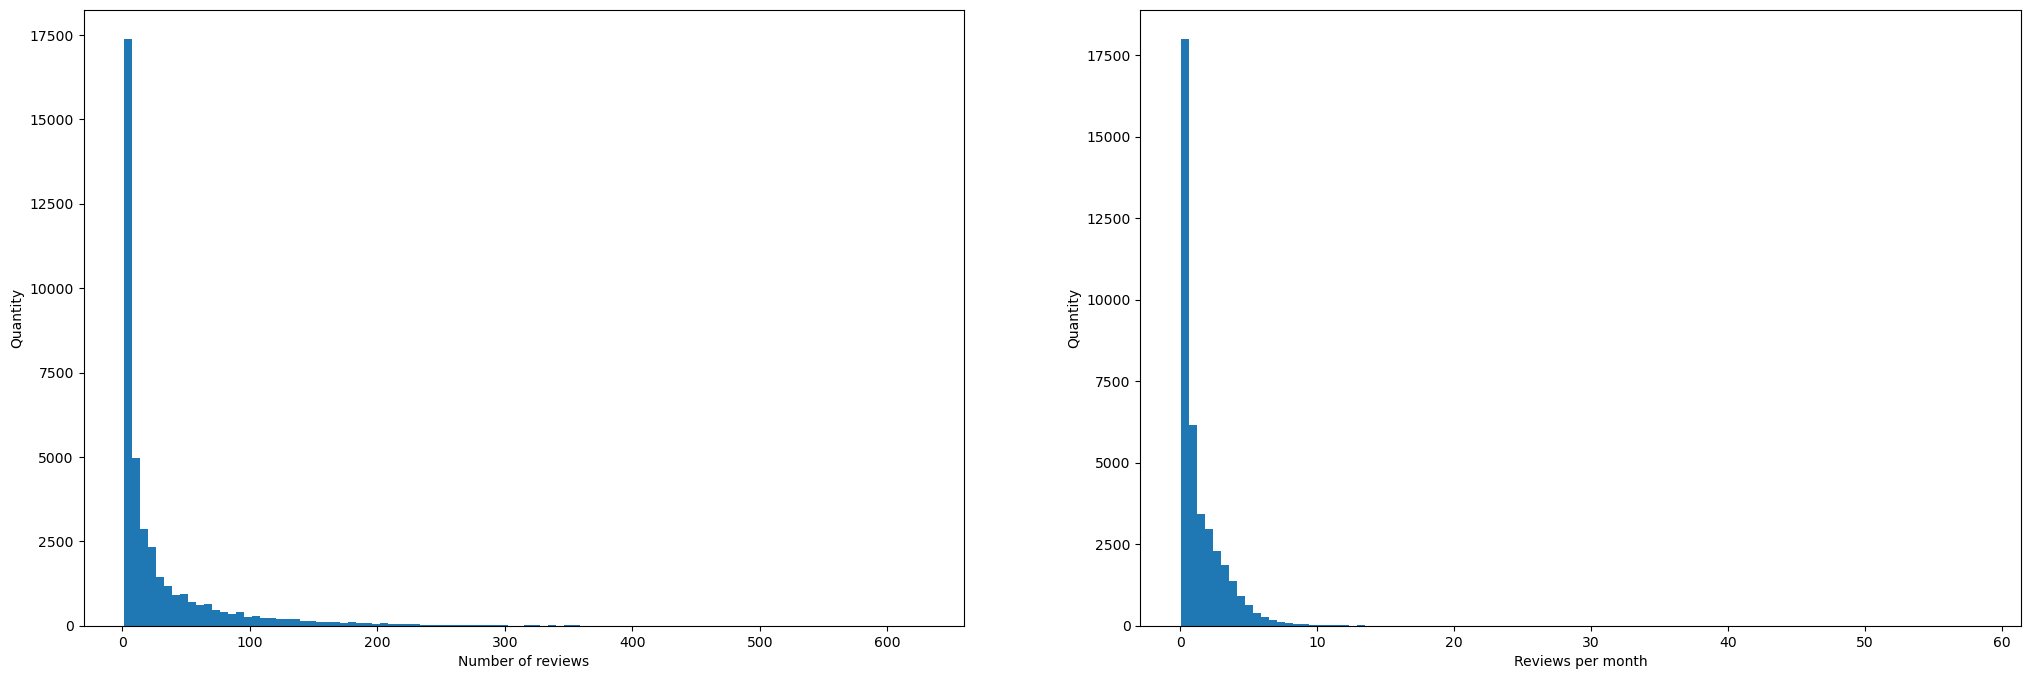

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))
axes = axes.ravel()

axes[0].hist(df['number_of_reviews'], bins=100);
axes[0].set_xlabel("Number of reviews")
axes[0].set_ylabel("Quantity")

axes[1].hist(df['reviews_per_month'], bins=100);
axes[1].set_xlabel("Reviews per month")
axes[1].set_ylabel("Quantity");

In [61]:
df_number_of_reviews_mean = df[['neighbourhood_group', 'number_of_reviews', 'room_type']].groupby(by=['neighbourhood_group', 'room_type']).mean()
df_number_of_reviews_mean.rename(columns={'number_of_reviews': 'number_of_reviews_mean'}, inplace=True)

In [62]:
df_reviews_per_month_mean = df[['neighbourhood_group', 'reviews_per_month', 'room_type']].groupby(by=['neighbourhood_group', 'room_type']).mean()
df_reviews_per_month_mean.rename(columns={'reviews_per_month': 'reviews_per_month_mean'}, inplace=True)

In [63]:
df_minimum_nights_mean = df[['neighbourhood_group', 'minimum_nights', 'room_type']].groupby(by=['neighbourhood_group', 'room_type']).mean()
df_minimum_nights_mean.rename(columns={'minimum_nights': 'minimum_nights_mean'}, inplace=True)

In [64]:
df_price_mean = df[['neighbourhood_group', 'price', 'room_type']].groupby(by=['neighbourhood_group', 'room_type']).mean()
df_price_mean.rename(columns={'price': 'price_mean'}, inplace=True)

In [65]:
df_count = df[['neighbourhood_group', 'id', 'room_type']].groupby(by=['neighbourhood_group', 'room_type']).count()
df_count.rename(columns={'id': 'count'}, inplace=True)

In [66]:
df_reviews = df_reviews_per_month_mean.merge(right=df_number_of_reviews_mean, on=['neighbourhood_group', 'room_type'])
df_reviews = df_reviews.merge(right=df_minimum_nights_mean, on=['neighbourhood_group', 'room_type'])
df_reviews = df_reviews.merge(right=df_count, on=['neighbourhood_group', 'room_type'])
df_reviews = df_reviews.merge(right=df_price_mean, on=['neighbourhood_group', 'room_type'])
df_reviews

reviews_per_month_mean  \
neighbourhood_group room_type                                 
Bronx               Entire home/apt                2.238123   
                    Private room                   1.641660   
                    Shared room                    1.351860   
Brooklyn            Entire home/apt                1.317630   
                    Private room                   1.255758   
                    Shared room                    1.070966   
Manhattan           Entire home/apt                1.141610   
                    Private room                   1.448949   
                    Shared room                    1.792781   
Queens              Entire home/apt                1.967302   
                    Private room                   1.947959   
                    Shared room                    1.522895   
Staten Island       Entire home/apt                2.074400   
                    Private room                   1.699182   
                    Shared room                    1.332000   

                                     number_of_reviews_mean  \
neighbourhood_group room_type                                 
Bronx               Entire home/apt               37.627832   
                    Private room                  31.129771   
                    Shared room                   10.046512   
Brooklyn            Entire home/apt               32.720235   
                    Private room                  26.730014   
                    Shared room                   19.975862   
Manhattan           Entire home/apt               23.592555   
                    Private room                  33.151054   
                    Shared room                   28.853933   
Queens              Entire home/apt               34.812859   
                    Private room                  34.910821   
                    Shared room                   18.059211   
Staten Island       Entire home/apt               39.046667   
                    Private room                  35.660377   
                    Shared room                    2.800000   

                                     minimum_nights_mean  count  price_mean  
neighbourhood_group room_type                                                
Bronx               Entire home/apt             5.637540    309  120.789644  
                    Private room                3.078244    524   57.093511  
                    Shared room                 2.093023     43   56.930233  
Brooklyn            Entire home/apt             5.909603   8164  171.249265  
                    Private room                4.686476   7993   73.339797  
                    Shared room                 6.227586    290   45.458621  
Manhattan           Entire home/apt             8.613123   9967  230.190830  
                    Private room                4.685053   6309  106.603265  
                    Shared room                 3.345506    356   77.980337  
Queens              Entire home/apt             4.369690   1742  139.225603  
                    Private room                4.132090   2680   69.286567  
                    Shared room                 4.085526    152   64.467105  
Staten Island       Entire home/apt             3.873333    150  125.366667  
                    Private room                3.018868    159   57.584906  
                    Shared room                 2.600000      5   57.600000

<AxesSubplot:>

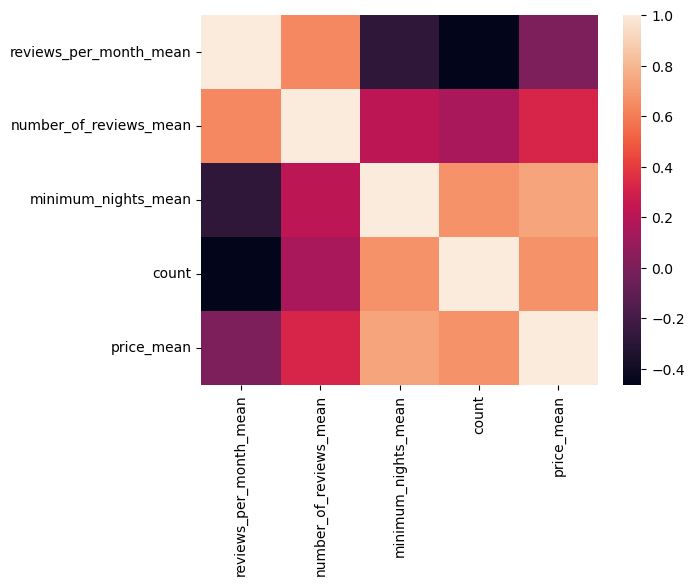

In [67]:
sns.heatmap(df_reviews.corr())

##### Conclusion: The busiest rental locations are in general the entire apt, espetially the ones in Bronx (2.2 reviews per month avg), followed by Staten Island (2 reviews per month avg) and Queens (1.9 reviews per month). A possible reason for this is the avg minimum_nights required to rent the place, and the price required.